In [1]:
from pylab import *
%matplotlib inline
import matplotlib.cm as mcm

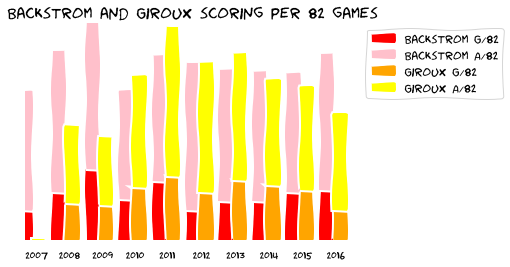

In [27]:
xkcd()
rcParams['font.size']=20
fig = gcf()
ax = gca()
xticks([]) # labels
yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)
    
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

# manual arrowhead width and length
hw = 10/20
hl = 10/20
lw = 10 # axis line width
ohg = 0.3 # arrow overhang

# compute matching arrowhead length and width
yhw = hw * height/width
yhl = hl * width/height

# draw x and y axis
#ax.arrow(0, 0, 10, 0., fc='k', ec='k', lw = lw,
#         head_width=hw, head_length=hl, overhang = ohg,
#         length_includes_head= True, clip_on = False)

#ax.arrow(0, 0, 0., 1, fc='k', ec='k', lw = lw,
#         head_width=yhw, head_length=yhl, overhang = ohg,
#         length_includes_head= True, clip_on = False)

#clip_on = True #if only positive x or y values.

xlim(2007, 2017)
ylim(0, 100)

backstrom_gg = [0.17, 0.27, 0.4, 0.23, 0.33, 0.17, 0.22, 0.22, 0.27, 0.28]
backstrom_ag = [0.67, 0.8, 0.83, 0.61, 0.71, 0.83, 0.74, 0.73, 0.67, 0.77]
giroux_gg = [0, 0.21, 0.2, 0.3, 0.36, 0.27, 0.34, 0.31, 0.28, 0.17]
giroux_ag = [0, 0.43, 0.38, 0.62, 0.84, 0.73, 0.71, 0.59, 0.58, 0.54]

import pandas as pd
df = pd.DataFrame({'Backstrom G/G': backstrom_gg, 'Backstrom A/G': backstrom_ag,
                  'Giroux G/G': giroux_gg, 'Giroux A/G': giroux_ag, 
                   'Season': [x for x in range(2007, 2017)]})
df.set_index('Season', inplace = True)
for col in df:
    df.loc[:, col] = df[col] * 82
    
bar(height = df['Backstrom G/G'], color = 'red', left = df.index, label = 'Backstrom G/82', width = 0.4)
bar(height = df['Backstrom A/G'], color = 'pink', bottom = df['Backstrom G/G'],
    left = df.index, label = 'Backstrom A/82', width = 0.4)
bar(height = df['Giroux G/G'], color = 'orange', left = df.index + 0.4, label = 'Giroux G/82', width = 0.4)
bar(height = df['Giroux A/G'], color = 'yellow', bottom = df['Giroux G/G'],
    left = df.index + 0.4, label = 'Giroux A/82', width = 0.4)
legend(loc=2, bbox_to_anchor=(1, 1), fontsize = 12)
title('Backstrom and Giroux scoring per 82 games', fontsize=16)
xticks(df.index.values, fontsize = 10, ha = 'left');